In [2]:
all_positive_species = ["Drosophila_aldrichi","Drosophila_buzzatii","Drosophila_eohydei","Drosophila_flavomontana","Drosophila_lacicola","Drosophila_mayaguana","Drosophila_mercatoru","Drosophila_paranaensis","Drosophila_repleta","Drosophila_affinis","Drosophila_americana","Drosophila_arizonae","Drosophila_hydei","Drosophila_littoralis","Drosophila_montana","Drosophila_virilis","Zaprionus_indianus"]

import pandas as pd
location = "/mnt/c/Users/sauba/Desktop/Drosophila_BUSCO_ERC/"
df = pd.read_csv(f"{location}/17.Testing_for_prediction/rers_39sp.csv")

# make a copy so original df is untouched
df_clean = df.copy()

# set geneid as index
df_clean = df_clean.set_index("Unnamed: 0")

# remove columns that are fully NA
df_clean = df_clean.dropna(axis=1, how="all")
# 

# clean species names (remove trailing .1, .2, etc.)
df_clean.columns = df_clean.columns.str.replace(r"\.\d+$", "", regex=True)

# merge duplicate species by summing (ignores NaNs)
df_clean = df_clean.groupby(df_clean.columns, axis=1).sum(min_count=1)

# optional: reset index if you want geneid back as a column
df_clean = df_clean.reset_index().rename(columns={"Unnamed: 0": "geneid"})
df_clean = df_clean.drop(columns=["NA"], errors="ignore")
df = df_clean.set_index("geneid").T

labels = {}
pos_lable = []
for species_name in df.index:
    if species_name in all_positive_species:
        labels[species_name] = 1
    else:
        labels[species_name] = 0
        # pos_lable.append(species_name)
# print(len(pos_lable),len(positive_species))
# labels
for speciesName in all_positive_species:
    if speciesName not in labels:
        print(speciesName, "Missing")
df["target"] = df.index.map(labels)

/tmp/ipykernel_978/209819435.py:21: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_clean = df_clean.groupby(df_clean.columns, axis=1).sum(min_count=1)


In [27]:
def remove_species(large_list, small_list):
    out_list = []
    for species in large_list:
        if species not in small_list:
            out_list.append(species)
    return(out_list)

positive_species = []
negative_species = []
for species in labels:
    if labels[species] == 1:
        positive_species.append(species)
    else:
        negative_species.append(species)
print(len(positive_species))
print(len(negative_species))

import random
random.seed(42)
train_pos_count = int(len(positive_species)/3)
train_neg_count = int(len(negative_species)/3)

training_set_pos = (random.sample(positive_species,train_pos_count+1 ))
rest = remove_species(positive_species,training_set_pos)
validation_set_pos = (random.sample(rest,train_pos_count ))
test_set_pos = remove_species(rest,validation_set_pos)
print(len(training_set_pos),len(validation_set_pos),len(test_set_pos))

training_set_neg = (random.sample(negative_species,train_neg_count+1 ))
rest = remove_species(negative_species,training_set_neg)

validation_set_neg = (random.sample(rest,train_neg_count ))
test_set_neg = remove_species(rest,validation_set_neg)

print(len(training_set_neg),len(validation_set_neg),len(test_set_neg))

training_labels = {}
for species in training_set_pos:
   training_labels[species] = 1
for species in training_set_neg:
   training_labels[species] = 0
print(training_labels)


17
22
6 5 6
8 7 7
{'Drosophila_arizonae': 1, 'Drosophila_affinis': 1, 'Drosophila_mercatoru': 1, 'Drosophila_buzzatii': 1, 'Zaprionus_indianus': 1, 'Drosophila_montana': 1, 'Drosophila_pseudoobscura': 0, 'Drosophila_ananassae': 0, 'Drosophila_albomicans': 0, 'Drosophila_biarmipes': 0, 'Drosophila_erecta': 0, 'Drosophila_madeirensis': 0, 'Drosophila_takahashii': 0, 'Drosophila_melanogaster': 0}


In [10]:
?random.choice

Signature: random.choice(seq)
Docstring: Choose a random element from a non-empty sequence.
File:      ~/miniconda3/envs/genomics_work/lib/python3.11/random.py
Type:      method

In [34]:
all_positive_species = ["Anthocharis_cardamines","Aporia_crataegi","Argynnis_bischoffii_washingtonia","Aricia_agestis","Aricia_artaxerxes","Battus_philenor","Boloria_euphrosyne","Boloria_selene","Brenthis_daphne","Brenthis_hecate","Brenthis_ino","Calycopis_cecrops","Celastrina_argiolus","Coenonympha_glycerion","Colias_nastes","Colias_palaeno","Cyaniris_semiargus","Danaus_plexippus","Erebia_aethiops","Erebia_ligea","Euphydryas_editha","Fabriciana_adippe","Glaucopsyche_alexis","Hipparchia_semele","Lasiommata_megera","Leptidea_juvernica","Leptidea_reali","Leptidea_sinapis","Lysandra_bellargus","Lysandra_coridon","Maniola_hyperantus","Maniola_jurtina","Melanargia_galathea","Melitaea_cinxia","Mellicta_athalia","Nymphalis_c-album","Nymphalis_io","Nymphalis_polychloros","Nymphalis_urticae","Oeneis_ivallda","Papilio_glaucus","Papilio_machaon","Papilio_xuthus","Pararge_aegeria","Parnassius_glacialis","Phengaris_arion","Pieris_brassicae","Pieris_mannii","Pieris_melete","Pieris_napi","Pieris_rapae","Plebejus_argus","Polyommatus_icarus","Polyommatus_iphigenia"]

import pandas as pd
location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias"
df = pd.read_csv(f"{location}/20.CLassification/rer_combined.csv")

# make a copy so original df is untouched
df_clean = df.copy()

# set geneid as index
df_clean = df_clean.set_index("Unnamed: 0")

# remove columns that are fully NA
df_clean = df_clean.dropna(axis=1, how="all")
# 

# clean species names (remove trailing .1, .2, etc.)
df_clean.columns = df_clean.columns.str.replace(r"\.\d+$", "", regex=True)

# merge duplicate species by summing (ignores NaNs)
df_clean = df_clean.groupby(df_clean.columns, axis=1).sum(min_count=1)

# optional: reset index if you want geneid back as a column
df_clean = df_clean.reset_index().rename(columns={"Unnamed: 0": "geneid"})
df_clean = df_clean.drop(columns=["NA"], errors="ignore")
df = df_clean.set_index("geneid").T

labels = {}
pos_lable = []
for species_name in df.index:
    if species_name in all_positive_species:
        labels[species_name] = 1
    else:
        labels[species_name] = 0
        # pos_lable.append(species_name)
# print(len(pos_lable),len(positive_species))
# labels
for speciesName in all_positive_species:
    if speciesName not in labels:
        print(speciesName, "Missing")
df["target"] = df.index.map(labels)
df_full = df.copy()
print(len(labels))

Colias_nastes Missing
Polyommatus_iphigenia Missing
89


/tmp/ipykernel_978/2345677816.py:21: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_clean = df_clean.groupby(df_clean.columns, axis=1).sum(min_count=1)


In [36]:
df

geneid,clock.fas.best.fas.ClipKIT,cry1a.fas.best.fas.ClipKIT,cry1b.fas.best.fas.ClipKIT,cry2.fas.best.fas.ClipKIT,cwo.fas.best.fas.ClipKIT,cycle.fas.best.fas.ClipKIT,period.fas.best.fas.ClipKIT,timeless.fas.best.fas.ClipKIT,timeout.fas.best.fas.ClipKIT,1058at7088.fas.best.fas.ClipKIT,...,982at7088.fas.best.fas.ClipKIT,983at7088.fas.best.fas.ClipKIT,984at7088.fas.best.fas.ClipKIT,986at7088.fas.best.fas.ClipKIT,988at7088.fas.best.fas.ClipKIT,992at7088.fas.best.fas.ClipKIT,993at7088.fas.best.fas.ClipKIT,994at7088.fas.best.fas.ClipKIT,998at7088.fas.best.fas.ClipKIT,target
Anthocharis_cardamines,0.496859,0.242615,0.701971,1.196124,1.113617,-0.443809,0.543440,1.654113,0.466311,-0.052344,...,-0.625036,-0.332211,-1.097434,0.849077,-0.189796,-0.343509,0.685951,-0.457384,4.024290,1
Aporia_crataegi,0.579045,0.504315,-0.445420,0.371323,1.547489,2.272003,0.414499,1.851160,1.106919,0.344402,...,-0.183931,0.675400,-0.970620,0.865416,0.324581,1.016650,1.627624,-0.526798,3.547792,1
Argynnis_bischoffii_washingtonia,0.687750,NaN,NaN,1.087023,1.388077,0.514957,1.844370,-0.476739,NaN,NaN,...,0.607558,NaN,-0.021340,NaN,NaN,NaN,NaN,NaN,NaN,1
Aricia_agestis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Aricia_artaxerxes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.183763,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Troides_oblongomaculatus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Vanessa_atalanta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Vanessa_cardui,0.230368,-1.167013,-0.494392,0.379579,-0.002847,-0.390822,-1.393467,-0.884682,2.902923,0.435606,...,0.495415,0.082291,1.210550,-0.087284,-0.492350,-0.889041,1.825047,0.788606,-0.475029,0
Vanessa_tameamea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.286378,NaN,...,1.452203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [77]:
def remove_species(large_list, small_list):
    out_list = []
    for species in large_list:
        if species not in small_list:
            out_list.append(species)
    return(out_list)

positive_species = []
negative_species = []
for species in labels:
    if labels[species] == 1:
        positive_species.append(species)
    else:
        negative_species.append(species)
print(len(positive_species))
print(len(negative_species))

import random
random.seed(42)
train_pos_count = int(len(positive_species)/2)
train_neg_count = int(len(negative_species)/2)

training_set_pos = (random.sample(positive_species,train_pos_count ))
rest = remove_species(positive_species,training_set_pos)
validation_set_pos = (random.sample(rest,train_pos_count ))
test_set_pos = remove_species(rest,validation_set_pos)
print(len(training_set_pos),len(validation_set_pos),len(test_set_pos))

training_set_neg = (random.sample(negative_species,train_neg_count ))
rest = remove_species(negative_species,training_set_neg)

validation_set_neg = (random.sample(rest,train_neg_count ))
test_set_neg = remove_species(rest,validation_set_neg)

print(len(training_set_neg),len(validation_set_neg),len(test_set_neg))

training_set = training_set_pos+training_set_neg
print(len(training_set))
test_set = validation_set_pos + test_set_pos+ validation_set_neg+test_set_neg

52
37
26 26 0
18 18 1
44


In [78]:
df = df_full.loc[df_full.index.isin(training_set)]
df

geneid,clock.fas.best.fas.ClipKIT,cry1a.fas.best.fas.ClipKIT,cry1b.fas.best.fas.ClipKIT,cry2.fas.best.fas.ClipKIT,cwo.fas.best.fas.ClipKIT,cycle.fas.best.fas.ClipKIT,period.fas.best.fas.ClipKIT,timeless.fas.best.fas.ClipKIT,timeout.fas.best.fas.ClipKIT,1058at7088.fas.best.fas.ClipKIT,...,982at7088.fas.best.fas.ClipKIT,983at7088.fas.best.fas.ClipKIT,984at7088.fas.best.fas.ClipKIT,986at7088.fas.best.fas.ClipKIT,988at7088.fas.best.fas.ClipKIT,992at7088.fas.best.fas.ClipKIT,993at7088.fas.best.fas.ClipKIT,994at7088.fas.best.fas.ClipKIT,998at7088.fas.best.fas.ClipKIT,target
Aporia_crataegi,0.579045,0.504315,-0.445420,0.371323,1.547489,2.272003,0.414499,1.851160,1.106919,0.344402,...,-0.183931,0.675400,-0.970620,0.865416,0.324581,1.016650,1.627624,-0.526798,3.547792,1
Argynnis_bischoffii_washingtonia,0.687750,NaN,NaN,1.087023,1.388077,0.514957,1.844370,-0.476739,NaN,NaN,...,0.607558,NaN,-0.021340,NaN,NaN,NaN,NaN,NaN,NaN,1
Battus_philenor,0.120775,0.331817,-0.120709,-0.633300,0.723868,1.099387,-0.163420,-0.495021,-0.014563,0.469606,...,NaN,NaN,NaN,0.733432,0.379536,0.200026,NaN,-0.524722,0.379140,1
Boloria_euphrosyne,1.182371,0.801733,NaN,1.321638,1.152358,2.584632,0.268700,0.013149,-1.490115,-0.412544,...,1.195935,-1.367962,0.647787,-0.860077,-0.436536,0.581428,NaN,NaN,NaN,1
Boloria_selene,1.448124,0.416606,NaN,-0.492695,1.468720,3.487251,-0.822403,-0.439132,-1.684074,0.635494,...,1.121460,-0.367861,0.895620,-0.829980,NaN,1.536821,1.204651,NaN,-0.311648,1
Brenthis_daphne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Celastrina_argiolus,0.135253,-0.765763,1.345256,-1.351506,2.216427,-1.614382,0.082115,-1.575312,0.009918,-0.541112,...,-1.219735,-0.586209,1.182184,-0.020999,-0.549719,-0.750885,-0.097407,-1.339384,-0.271173,1
Coenonympha_glycerion,0.733797,1.294707,0.832016,0.395383,-0.484195,-0.174684,0.840712,0.848133,-0.258644,0.337978,...,0.514909,-0.789508,0.428671,-0.170420,-2.296978,0.576006,-2.016416,0.008807,-1.595123,1
Colias_croceus,0.191697,2.666862,-0.725484,NaN,-0.278133,NaN,NaN,NaN,-0.126602,0.902321,...,-0.421522,NaN,0.099974,NaN,1.575398,-0.755262,NaN,NaN,NaN,0
Colias_eurytheme,NaN,NaN,NaN,NaN,0.413975,-0.430631,-0.536512,NaN,0.230168,NaN,...,NaN,0.252522,0.236305,NaN,1.001140,NaN,NaN,NaN,NaN,0


Best threshold for max F1: 0.48 (F1=0.839)
              precision    recall  f1-score   support

           0      1.000     0.444     0.615        18
           1      0.722     1.000     0.839        26

    accuracy                          0.773        44
   macro avg      0.861     0.722     0.727        44
weighted avg      0.836     0.773     0.747        44



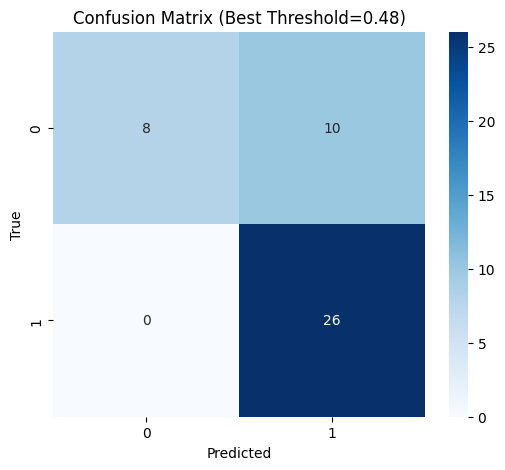

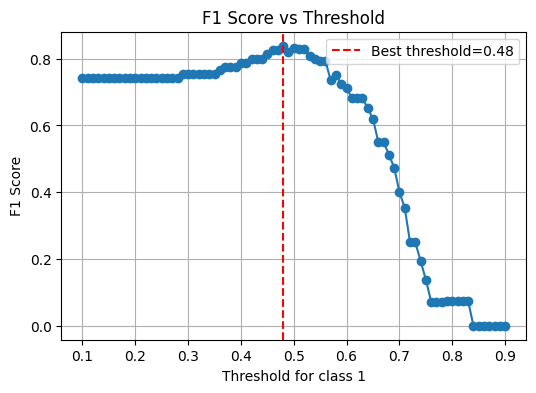

Top 20 important genes:
                                  Gene  Importance
3533   9999at7088.fas.best.fas.ClipKIT    0.009295
4430    563at7088.fas.best.fas.ClipKIT    0.009092
4119   1974at7088.fas.best.fas.ClipKIT    0.006691
1543   3589at7088.fas.best.fas.ClipKIT    0.006186
1101   2304at7088.fas.best.fas.ClipKIT    0.005796
626   13317at7088.fas.best.fas.ClipKIT    0.005407
3253   9044at7088.fas.best.fas.ClipKIT    0.005284
1011  15437at7088.fas.best.fas.ClipKIT    0.004935
3029   8317at7088.fas.best.fas.ClipKIT    0.004920
3783  10875at7088.fas.best.fas.ClipKIT    0.004754
623   13310at7088.fas.best.fas.ClipKIT    0.004480
1049  15831at7088.fas.best.fas.ClipKIT    0.004233
4183   2169at7088.fas.best.fas.ClipKIT    0.004209
2420   6352at7088.fas.best.fas.ClipKIT    0.004112
922   14886at7088.fas.best.fas.ClipKIT    0.004091
1134   2418at7088.fas.best.fas.ClipKIT    0.004048
3250   9025at7088.fas.best.fas.ClipKIT    0.003968
3224   8927at7088.fas.best.fas.ClipKIT    0.003757
1762   

/tmp/ipykernel_978/2246139895.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Gene', data=importance_df, palette='viridis')


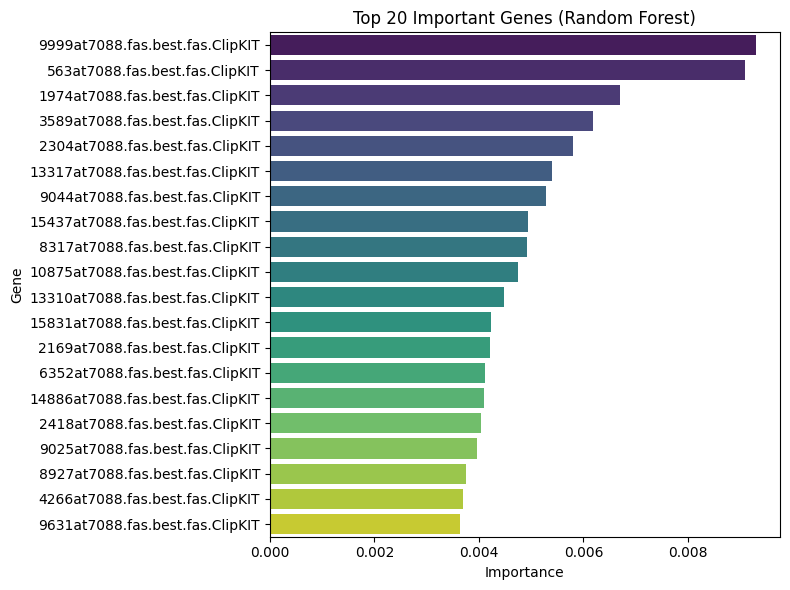

In [89]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Features and labels ---
X = df.drop(columns="target")
y = df["target"]

# --- 2. Define pipeline: KNN Imputer + Random Forest ---
rf_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5, weights="uniform")),
    ("rf", RandomForestClassifier(
        n_estimators=1000,
        max_depth=None,
        max_features="sqrt",
        bootstrap=True,
        class_weight="balanced",  # optional, improves minority class recall
        random_state=42,
        n_jobs=-1
    ))
])

# --- 3. Cross-validated predicted probabilities ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_proba = cross_val_predict(rf_pipeline, X, y, cv=cv, method="predict_proba")

# --- 4. Search for best threshold ---
thresholds = np.linspace(0.1, 0.9, 81)
f1_scores = []

for t in thresholds:
    y_pred = (y_proba[:,1] >= t).astype(int)
    f1_scores.append(f1_score(y, y_pred))

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold for max F1: {best_threshold:.2f} (F1={f1_scores[best_idx]:.3f})")

# --- 5. Final predictions ---
y_pred_best = (y_proba[:,1] >= best_threshold).astype(int)

# --- 6. Classification report ---
print(classification_report(y, y_pred_best, digits=3))

# --- 7. Confusion matrix ---
cm = confusion_matrix(y, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (Best Threshold={best_threshold:.2f})")
plt.show()

# --- 8. Plot F1 vs threshold ---
plt.figure(figsize=(6,4))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best threshold={best_threshold:.2f}')
plt.xlabel("Threshold for class 1")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

# --- 9. Fit RF on full data to get feature importances ---
rf_pipeline.fit(X, y)
importances = rf_pipeline.named_steps['rf'].feature_importances_
feature_names = X.columns

# --- 10. Top 20 important genes ---
importance_df = pd.DataFrame({
    'Gene': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

print("Top 20 important genes:")
print(importance_df)

# Optional: barplot of top 20 genes
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Gene', data=importance_df, palette='viridis')
plt.title("Top 20 Important Genes (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

Best threshold for max F1: 0.44 (F1=0.754)
              precision    recall  f1-score   support

           0      0.667     0.333     0.444        18
           1      0.657     0.885     0.754        26

    accuracy                          0.659        44
   macro avg      0.662     0.609     0.599        44
weighted avg      0.661     0.659     0.627        44



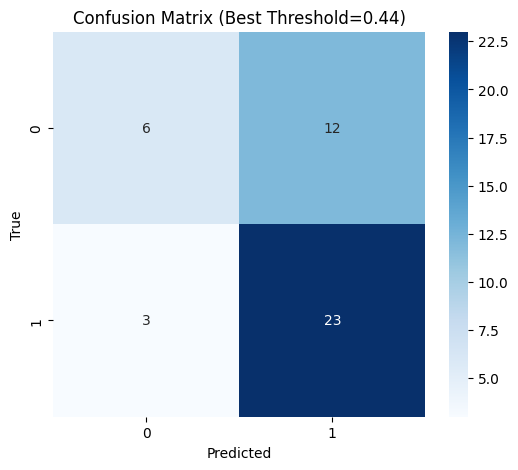

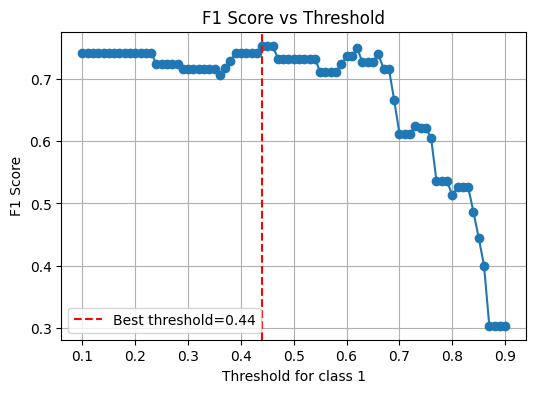

AttributeError: 'XGBClassifier' object has no attribute 'named_steps'

In [92]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Features and labels ---
X = df.drop(columns="target")
y = df["target"]

# --- 2. Define pipeline: KNN Imputer + Random Forest ---
rf_pipeline = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# --- 3. Cross-validated predicted probabilities ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_proba = cross_val_predict(rf_pipeline, X, y, cv=cv, method="predict_proba")

# --- 4. Search for best threshold ---
thresholds = np.linspace(0.1, 0.9, 81)
f1_scores = []

for t in thresholds:
    y_pred = (y_proba[:,1] >= t).astype(int)
    f1_scores.append(f1_score(y, y_pred))

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"Best threshold for max F1: {best_threshold:.2f} (F1={f1_scores[best_idx]:.3f})")

# --- 5. Final predictions ---
y_pred_best = (y_proba[:,1] >= best_threshold).astype(int)

# --- 6. Classification report ---
print(classification_report(y, y_pred_best, digits=3))

# --- 7. Confusion matrix ---
cm = confusion_matrix(y, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (Best Threshold={best_threshold:.2f})")
plt.show()

# --- 8. Plot F1 vs threshold ---
plt.figure(figsize=(6,4))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best threshold={best_threshold:.2f}')
plt.xlabel("Threshold for class 1")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

# --- 9. Fit RF on full data to get feature importances ---
rf_pipeline.fit(X, y)
importances = rf_pipeline.named_steps['rf'].feature_importances_
feature_names = X.columns

# --- 10. Top 20 important genes ---
importance_df = pd.DataFrame({
    'Gene': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

print("Top 20 important genes:")
print(importance_df)

# Optional: barplot of top 20 genes
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Gene', data=importance_df, palette='viridis')
plt.title("Top 20 Important Genes (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Gene")
plt.tight_layout()
plt.show()

/tmp/ipykernel_978/1483945441.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df.index.map(labels)


Mean CV Accuracy: 0.619


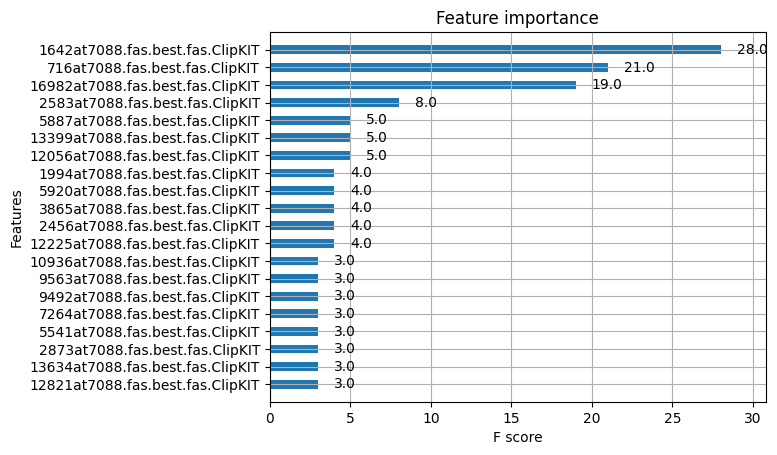

In [40]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb

df["target"] = df.index.map(labels)

# --- 4. Separate features and labels ---
X = df.drop(columns="target")
y = df["target"]

# --- 5. Train XGBoost with cross-validation ---
model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# cross-validation (stratified, because class balance matters)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")

print(f"Mean CV Accuracy: {scores.mean():.3f}")

# --- 6. Fit final model on all data ---
model.fit(X, y)

# --- 7. Feature importance (which genes matter most) ---
import matplotlib.pyplot as plt

xgb.plot_importance(model, max_num_features=20, height=0.5)
plt.show()

In [93]:
# import pandas as pd
# location = "/mnt/c/Users/sauba/Desktop/Drosophila_BUSCO_ERC/"
# df_100 = pd.read_csv(f"{location}/17.Testing_for_prediction/rers_100sp.csv")
# df_clean = df_100.copy()

# # set geneid as index
# df_clean = df_clean.set_index("Unnamed: 0")

# # remove columns that are fully NA
# df_clean = df_clean.dropna(axis=1, how="all")
# # 

# # clean species names (remove trailing .1, .2, etc.)
# df_clean.columns = df_clean.columns.str.replace(r"\.\d+$", "", regex=True)

# # merge duplicate species by summing (ignores NaNs)
# df_clean = df_clean.groupby(df_clean.columns, axis=1).sum(min_count=1)

# # optional: reset index if you want geneid back as a column
# df_clean = df_clean.reset_index().rename(columns={"Unnamed: 0": "geneid"})
# df_clean = df_clean.drop(columns=["NA"], errors="ignore")
new_df = df_full.loc[df_full.index.isin(test_set)] 
df_100 = new_df[X.columns] 
# df_100

# filtered_s = df_100[df_100.index.isin(y.index.to_list())]
# (filtered_s)

X_new = df_100[X.columns]
y_proba_new = rf_pipeline.predict_proba(X_new)
y_pred_new = (y_proba_new[:, 1] >= best_threshold).astype(int)
print(y_pred_new)


# new_df = df_clean.set_index("geneid").T 
# new_df = new_df.reindex(columns=X.columns, fill_value=np.nan)
# preds = model.predict(new_df)         # class predictions (0/1)
# probs = model.predict_proba(new_df)   # probabilities for each class

# --- 3. Attach results back to species ---
results = pd.DataFrame({
    "species": df_100.index,
    "predicted_class": y_pred_new,
    "prob_negative": y_proba_new[:, 0],
    "prob_positive": y_proba_new[:, 1]
})

print(results)
# results.to_csv(f"{location}/17.Testing_for_prediction/rers_100sp_prediction_new_2.csv", index = False)
# from sklearn.metrics import classification_report, confusion_matrix

# print(classification_report(y, y_pred_new, digits=3))
# cm = confusion_matrix(y, y_pred_new)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.show()

[1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 1]
                      species  predicted_class  prob_negative  prob_positive
0      Anthocharis_cardamines                1       0.266806       0.733194
1              Aricia_agestis                0       0.607608       0.392392
2           Aricia_artaxerxes                1       0.456446       0.543554
3            Bicyclus_anynana                1       0.080428       0.919572
4             Brenthis_hecate                1       0.390892       0.609108
5                Brenthis_ino                0       0.588102       0.411898
6           Calycopis_cecrops                0       0.610206       0.389794
7            Danaus_plexippus                0       0.768245       0.231755
8        Dryas_iulia_moderata                0       0.798318       0.201682
9                Erebia_ligea                1       0.172928       0.827072
10          Euphydryas_editha                1       0.15557

In [94]:
count_true = 0
count_false = 0
for lines in results.iterrows():
    if abs((lines[1].prob_negative) - (lines[1].prob_positive)) > 0.1:
        if (lines[1].predicted_class) == 1 and (lines[1].species) in  all_positive_species:
            # print(lines[1].species, "true")
            count_true += 1
        elif (lines[1].predicted_class) == 0 and (lines[1].species) not in  all_positive_species:
            # print(lines[1].species, "true negative", (lines[1].prob_negative) - (lines[1].prob_positive))
            count_true += 1
        else:
            print(lines[1].species, "False", (lines[1].prob_negative) - (lines[1].prob_positive))
            count_false += 1
    else:
        pass
        # print(lines[1].species, "Confused")
print(count_true, count_true/(count_true+count_false))

Aricia_agestis False 0.21521660685539246
Bicyclus_anynana False -0.8391433954238892
Brenthis_ino False 0.17620360851287842
Calycopis_cecrops False 0.22041261196136475
Danaus_plexippus False 0.536489263176918
Leptophobia_aripa False -0.5136899948120117
Papilio_dardanus_tibullus False -0.3789588212966919
Papilio_memnon False -0.45924079418182373
Papilio_polytes False -0.44169390201568604
Papilio_protenor False -0.8696590662002563
Phengaris_arion False 0.1358720064163208
Teinopalpus_imperialis False -0.570874810218811
Troides_aeacus False -0.26772236824035645
23 0.6388888888888888


In [54]:
output = "Species,predicted_class,prob_negative,prob_positive"
for i in range(len(df_100.index)):
    output += f"\n{df_100.index[i]},{y_pred_new[i]},{y_proba_new[i][0]},{y_proba_new[i][1]}"

print(output)

Species,predicted_class,prob_negative,prob_positive
Aricia_agestis,1,0.36090952157974243,0.6390904784202576
Bicyclus_anynana,1,0.05112189054489136,0.9488781094551086
Brenthis_hecate,1,0.17921686172485352,0.8207831382751465
Calycopis_cecrops,1,0.4645332098007202,0.5354667901992798
Danaus_plexippus,0,0.8469319939613342,0.15306799113750458
Dryas_iulia_moderata,0,0.8627012968063354,0.13729873299598694
Euphydryas_editha,1,0.22125250101089478,0.7787474989891052
Glaucopsyche_alexis,1,0.12965327501296997,0.87034672498703
Lasiommata_megera,1,0.12135815620422363,0.8786418437957764
Leptidea_juvernica,1,0.11528587341308594,0.8847141265869141
Leptidea_reali,1,0.20714640617370605,0.792853593826294
Leptophobia_aripa,1,0.3090534806251526,0.6909465193748474
Mechanitis_messenoides,1,0.2293345332145691,0.7706654667854309
Napeogenes_sylphis,0,0.7961393594741821,0.20386061072349548
Oeneis_ivallda,1,0.011831939220428467,0.9881680607795715
Papilio_glaucus,1,0.12262839078903198,0.877371609210968
Papilio_memno

In [24]:
y_pred_new

array([[1, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1,

In [21]:
y_proba_new[1][1]

0.273